# Exploratory Data Analysis

## Basics

In [20]:
import polars as pl

df = pl.read_csv("../data/Mental_Health_and_Social_Media_Balance_Dataset.csv")
df.head()

User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
str,i64,str,f64,f64,f64,f64,f64,str,f64
"""U001""",44,"""Male""",3.1,7.0,6.0,2.0,5.0,"""Facebook""",10.0
"""U002""",30,"""Other""",5.1,7.0,8.0,5.0,3.0,"""LinkedIn""",10.0
"""U003""",23,"""Other""",7.4,6.0,7.0,1.0,3.0,"""YouTube""",6.0
"""U004""",36,"""Female""",5.7,7.0,8.0,1.0,1.0,"""TikTok""",8.0
"""U005""",34,"""Female""",7.0,4.0,7.0,5.0,1.0,"""X (Twitter)""",8.0


In [21]:
df.describe()

statistic,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
str,str,f64,str,f64,f64,f64,f64,f64,str,f64
"""count""","""500""",500.0,"""500""",500.0,500.0,500.0,500.0,500.0,"""500""",500.0
"""null_count""","""0""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,"""0""",0.0
"""mean""",null,32.988,null,5.53,6.304,6.618,3.134,2.448,null,8.376
"""std""",null,9.960637,null,1.734877,1.529792,1.542996,1.858751,1.428067,null,1.524228
"""min""","""U001""",16.0,"""Female""",1.0,2.0,2.0,0.0,0.0,"""Facebook""",4.0
"""25%""",null,24.0,null,4.3,5.0,6.0,2.0,1.0,null,7.0
"""50%""",null,34.0,null,5.6,6.0,7.0,3.0,2.0,null,9.0
"""75%""",null,41.0,null,6.7,7.0,8.0,5.0,3.0,null,10.0
"""max""","""U500""",49.0,"""Other""",10.8,10.0,10.0,9.0,7.0,"""YouTube""",10.0


In [22]:
TOTAL = df.count().item(0, 0)

## Distribution

### Categorical Features

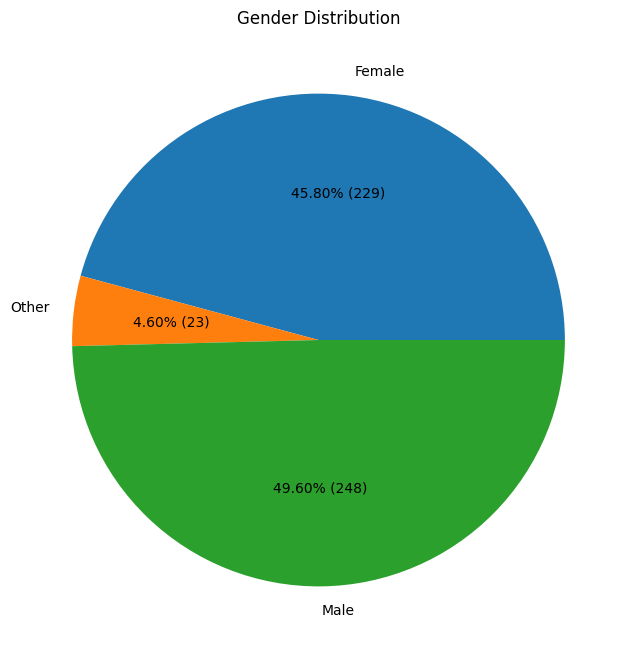

In [23]:
import matplotlib.pyplot as plt

gender_distribution = df.group_by("Gender").agg(pl.col("Gender").count().alias("Count"))

plt.figure(figsize=(10, 8))
plt.pie(
    gender_distribution.select("Count").to_series(),
    labels=gender_distribution.select("Gender").to_series(),
    autopct=lambda pct: f"{pct:.2f}% ({int(pct * df.select("Gender").count().item() / 100)})"
)
plt.title("Gender Distribution")
plt.show()

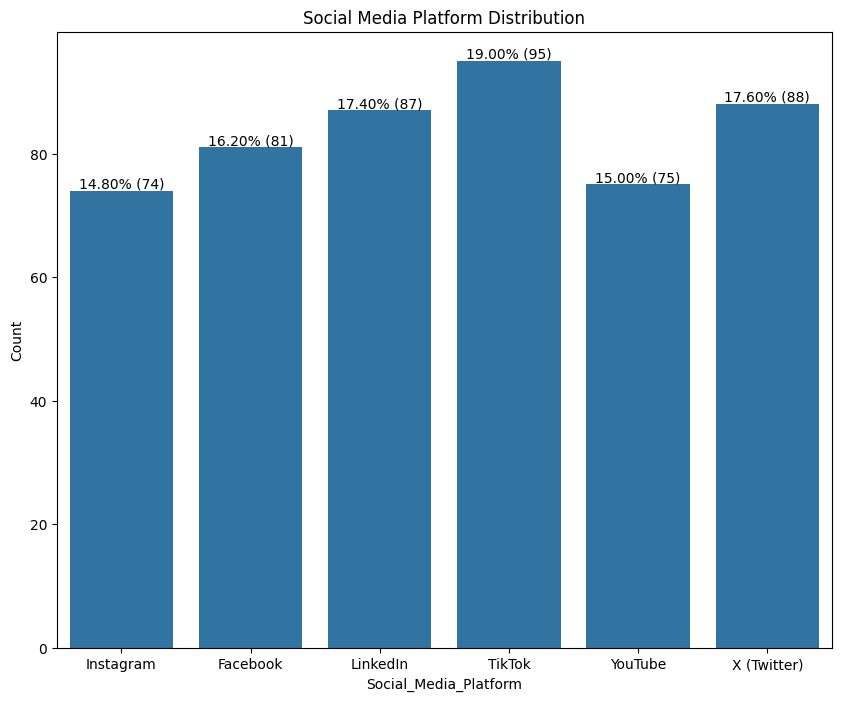

In [24]:
import seaborn as sns

social_media_distribution = df.group_by("Social_Media_Platform").agg(pl.col("Social_Media_Platform").count().alias("Count"))

plt.figure(figsize=(10, 8))
ax1 = sns.barplot(social_media_distribution, x="Social_Media_Platform", y="Count")
labels = [f"{count / TOTAL * 100:.2f}% ({count})" for count in social_media_distribution.select("Count").to_series()]
plt.bar_label(ax1.containers[0], labels=labels)
plt.title("Social Media Platform Distribution")
plt.show()

### Numeric Features

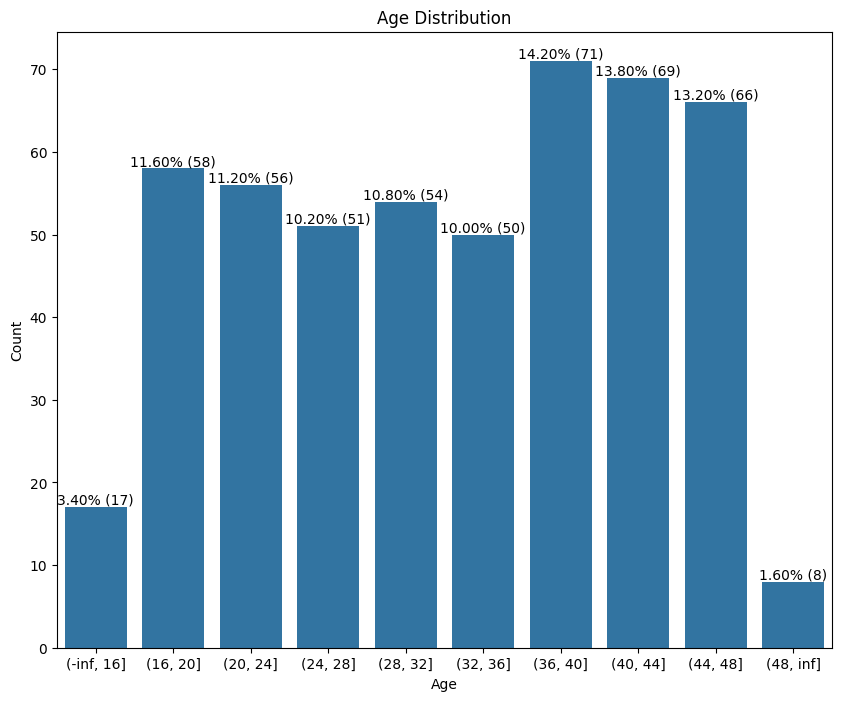

In [25]:
import numpy as np


age_distribution = df.select("Age")

min_value = age_distribution.min().item()
max_value = age_distribution.max().item()

breaks = np.arange(start=min_value, stop=max_value, step=4) 
age_distribution = age_distribution.to_series() \
                    .cut(breaks=breaks) \
                    .to_frame() \
                    .group_by("Age") \
                    .agg(pl.col("Age") \
                    .count() \
                    .alias("Count")) \
                    .sort("Age")

plt.figure(figsize=(10, 8))
ax1 = sns.barplot(age_distribution, x="Age", y="Count", order=age_distribution.select("Age").to_series())
labels = [f"{count / TOTAL * 100:.2f}% ({count})" for count in age_distribution.select("Count").to_series()]
plt.bar_label(ax1.containers[0], labels=labels)
plt.title("Age Distribution")
plt.show()

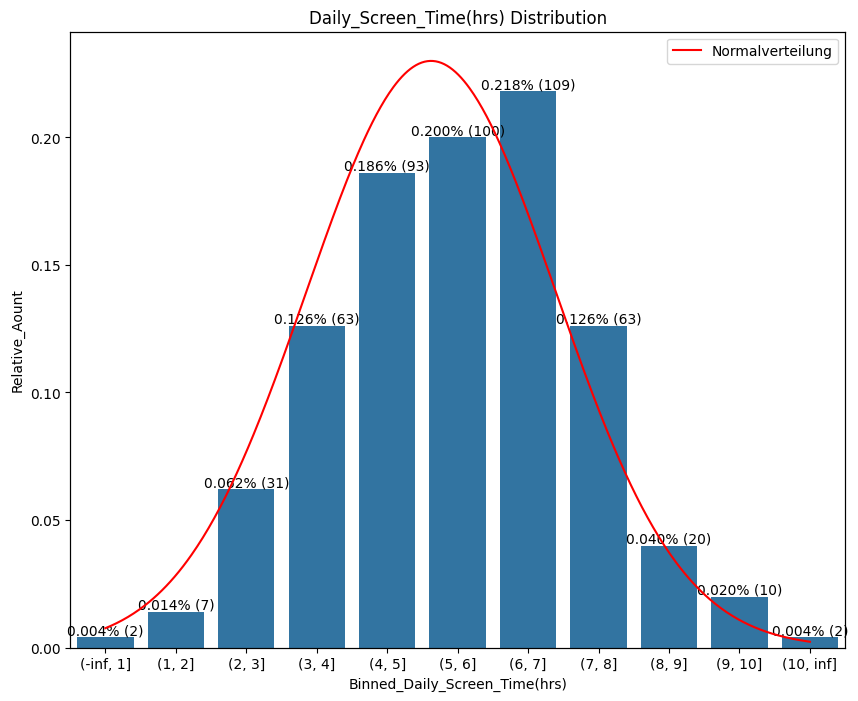

In [26]:
from scipy.stats import norm

screen_time_df = df.select("Daily_Screen_Time(hrs)")

min_value = screen_time_df.min().item()
max_value = screen_time_df.max().item()

breaks = np.arange(start=min_value, stop=max_value, step=1) 
 
screen_time_distribution = df.with_columns(pl.col("Daily_Screen_Time(hrs)").cut(breaks).alias("Binned_Daily_Screen_Time(hrs)")) \
                                .group_by("Binned_Daily_Screen_Time(hrs)") \
                                .agg(
                                    (pl.col("Daily_Screen_Time(hrs)").count() / TOTAL).alias("Relative_Aount"),
                                    pl.col("Daily_Screen_Time(hrs)").min().alias("Min")
                                ) \
                                .sort("Min")
                                
mean = df.select("Daily_Screen_Time(hrs)").mean().item()
std = df.select("Daily_Screen_Time(hrs)").std().item()

x_norm = np.linspace(min_value, max_value, 500)
y_norm = norm.pdf(x_norm, loc=mean, scale=std)

plt.figure(figsize=(10, 8))
ax1 = sns.barplot(
    screen_time_distribution,
    x="Binned_Daily_Screen_Time(hrs)",
    y="Relative_Aount",
    order=screen_time_distribution.select("Binned_Daily_Screen_Time(hrs)").to_series()
)
labels = [f"{rel:.3f}% ({int(rel * TOTAL)})" for rel in screen_time_distribution.select("Relative_Aount").to_series()]
plt.bar_label(ax1.containers[0], labels=labels)
ax2 = ax1.twiny()
ax2.plot(x_norm, y_norm, color="red", label="Normalverteilung")
ax2.set_xticks([])
ax2.legend()
plt.title("Daily_Screen_Time(hrs) Distribution")
plt.show()

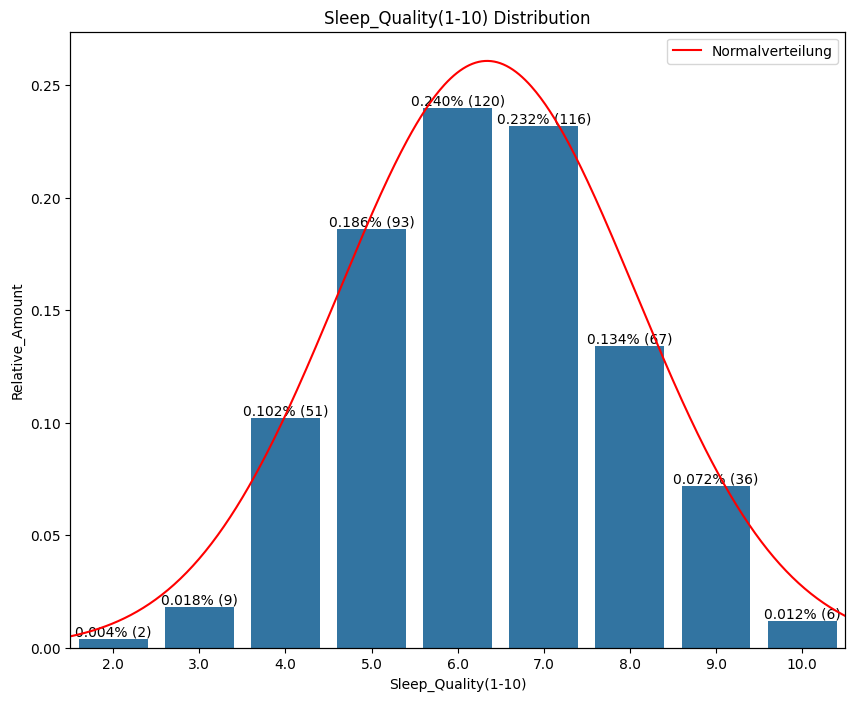

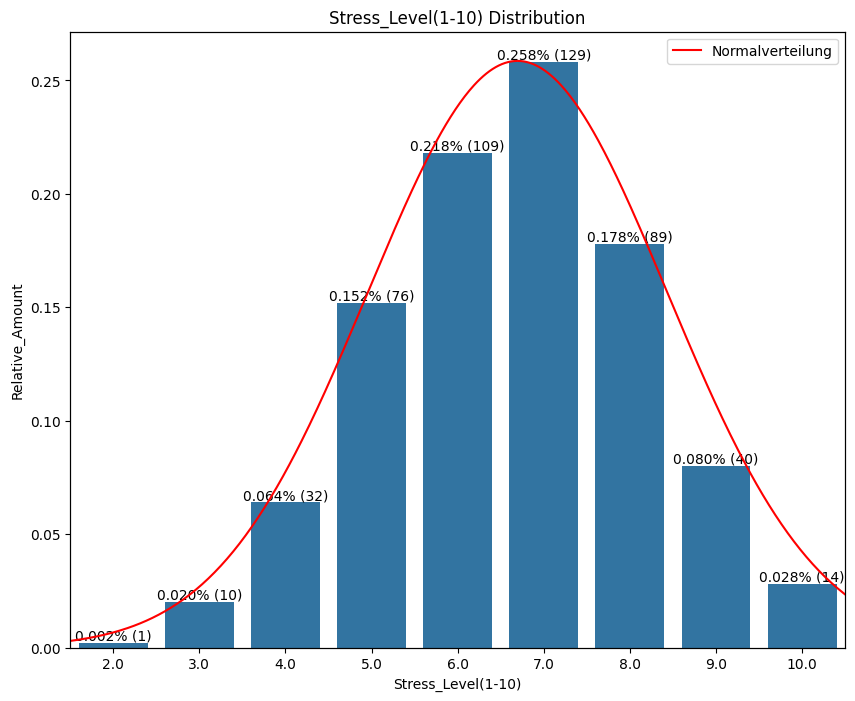

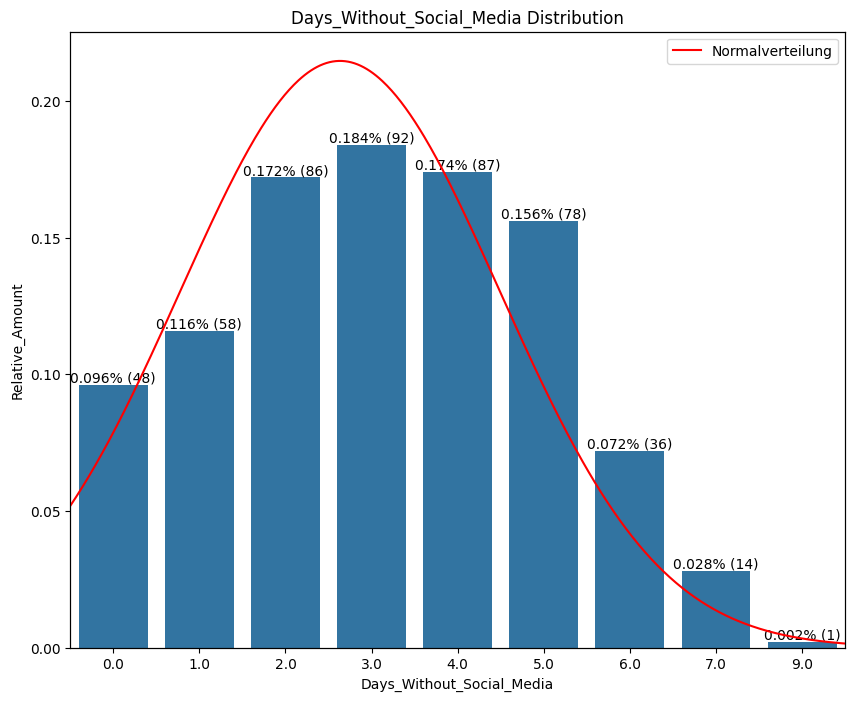

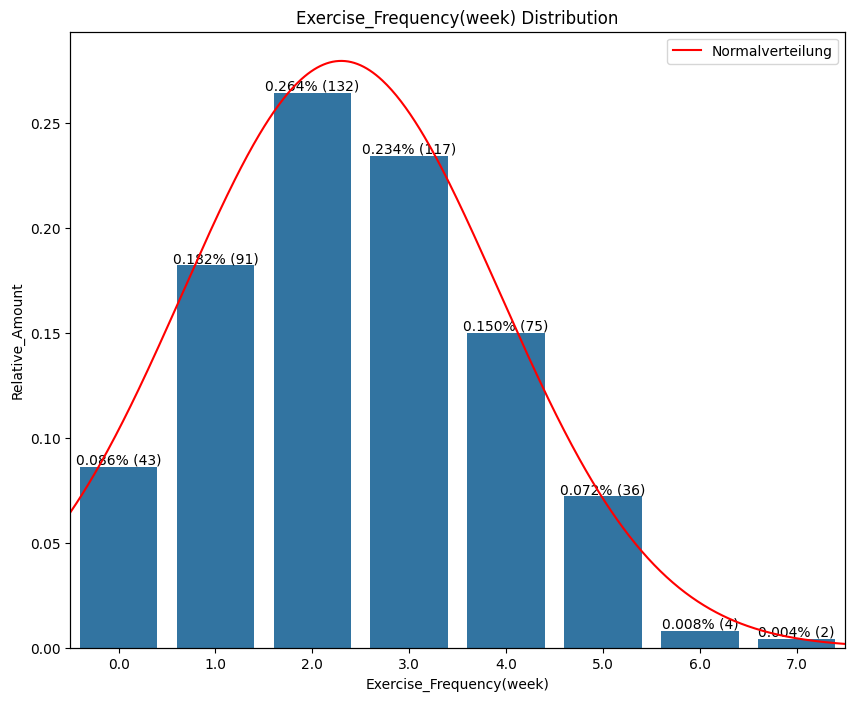

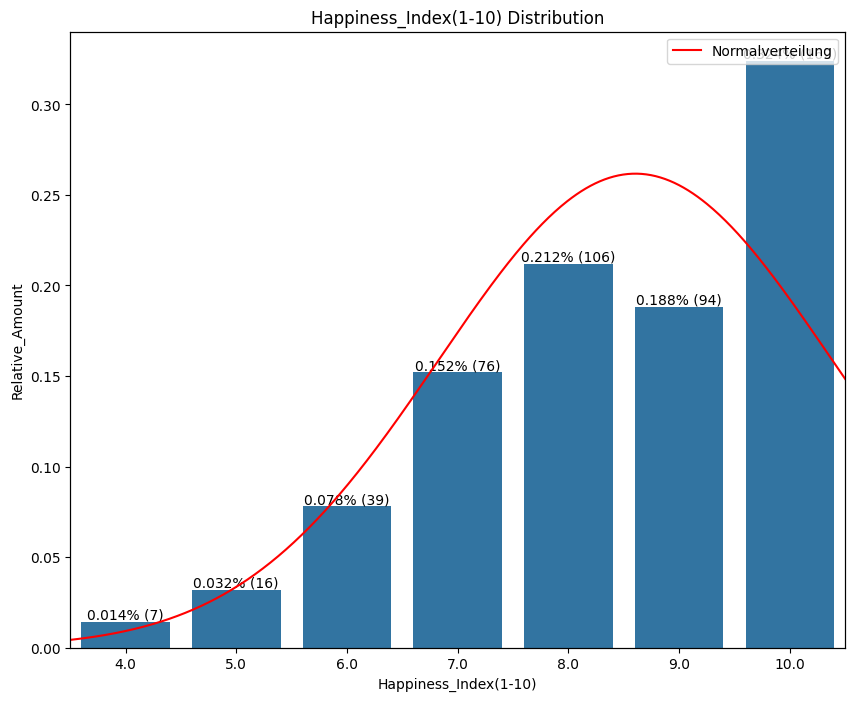

In [27]:
left_over_cols = ["Sleep_Quality(1-10)", "Stress_Level(1-10)", "Days_Without_Social_Media", "Exercise_Frequency(week)","Happiness_Index(1-10)"]

for col in left_over_cols:    
    distribution = df.group_by(col).agg(
        (pl.col(col).count() / TOTAL).alias("Relative_Amount"),
        pl.col(col).min().alias("Min"),
        pl.col(col).max().alias("Max"),
        ).sort(col)
    
    min = distribution.select("Min").min().item()
    max = distribution.select("Max").max().item()
    mean = df.select(col).mean().item()
    std = df.select(col).std().item()
    
    x_norm = np.linspace(min, max, 500)
    y_norm = norm.pdf(x_norm, loc=mean, scale=std)
    
    plt.figure(figsize=(10, 8))
    ax1 = sns.barplot(distribution, x=col, y="Relative_Amount")
    labels = [f"{rel:.3f}% ({int(rel * TOTAL)})" for rel in distribution.select("Relative_Amount").to_series()]
    plt.bar_label(ax1.containers[0], labels=labels)
    ax2 = ax1.twiny()
    ax2.plot(x_norm, y_norm, color="red", label="Normalverteilung")
    ax2.set_xlim(min, max)
    ax2.set_xticks([])
    ax2.legend()
    plt.title(f"{col} Distribution")
    plt.show()

## Correlation

In [28]:
from scipy.stats import pearsonr

numeric_columns = [col for col, col_type in zip(df.columns, df.dtypes) if col_type.is_numeric()]

correlation = []
significance = []
pvalues = []
for f1 in numeric_columns:
    correlation_row = []
    significance_row = []
    pvalues_row = []
    for f2 in numeric_columns:
        if f1 == f2:
            correlation_row.append(1)
            significance_row.append(True)
            pvalues_row.append(0)
            continue
        
        x, y = df.select(f1, f2).to_numpy().T
        res = pearsonr(x, y)
        
        correlation_row.append(res.statistic)
        significance_row.append(True if res.pvalue < 0.05 else False)
        pvalues_row.append(res.pvalue)
        
    correlation.append(correlation_row)
    significance.append(significance_row)
    pvalues.append(pvalues_row)

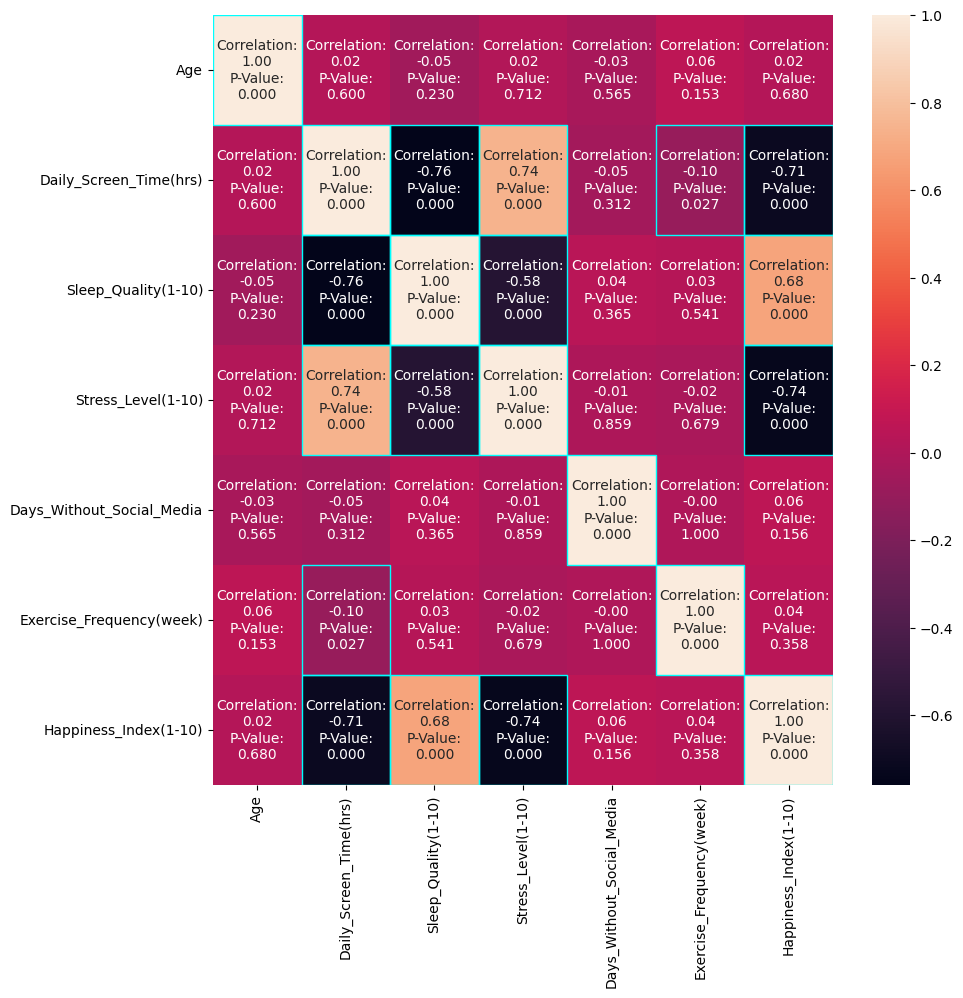

In [29]:
from matplotlib import patches

plt.figure(figsize=(10, 10))

annot = [
    [f"Correlation:\n{corr:.2f}\nP-Value:\n{pval:.3f}" for corr, pval in zip(corr_row, pval_row)]
    for corr_row, pval_row in zip(correlation, pvalues)
]

ax1 = sns.heatmap(correlation, xticklabels=numeric_columns, yticklabels=numeric_columns, annot=annot, fmt="")

for row_idx, row in enumerate(significance):
    for column_idx, value  in enumerate(row):
        if value:
            rect = patches.Rectangle([row_idx, column_idx], 1, 1, edgecolor="cyan", fill=False)
            ax1.add_patch(rect)
            
plt.show()

## Plots

### Screentime and Wellbeing

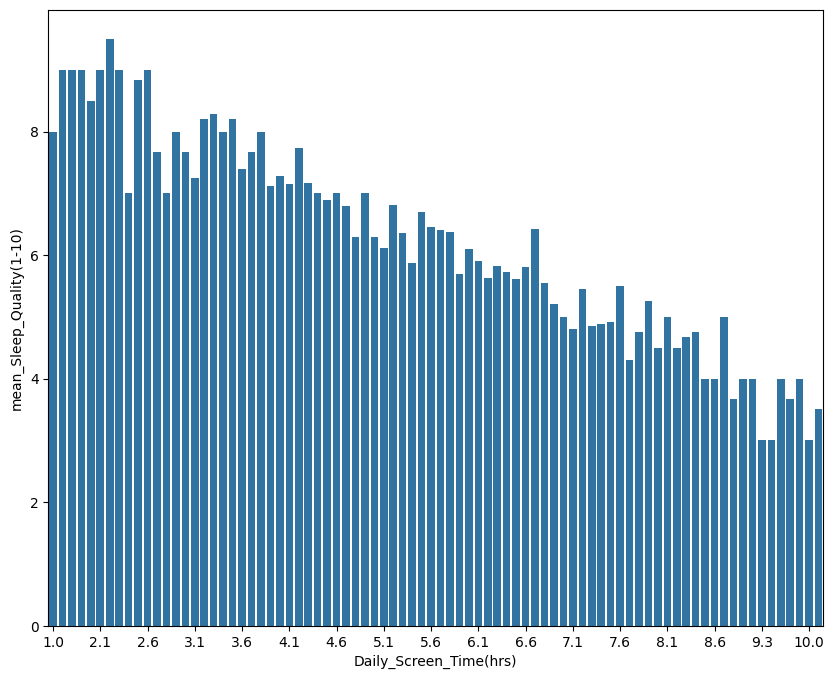

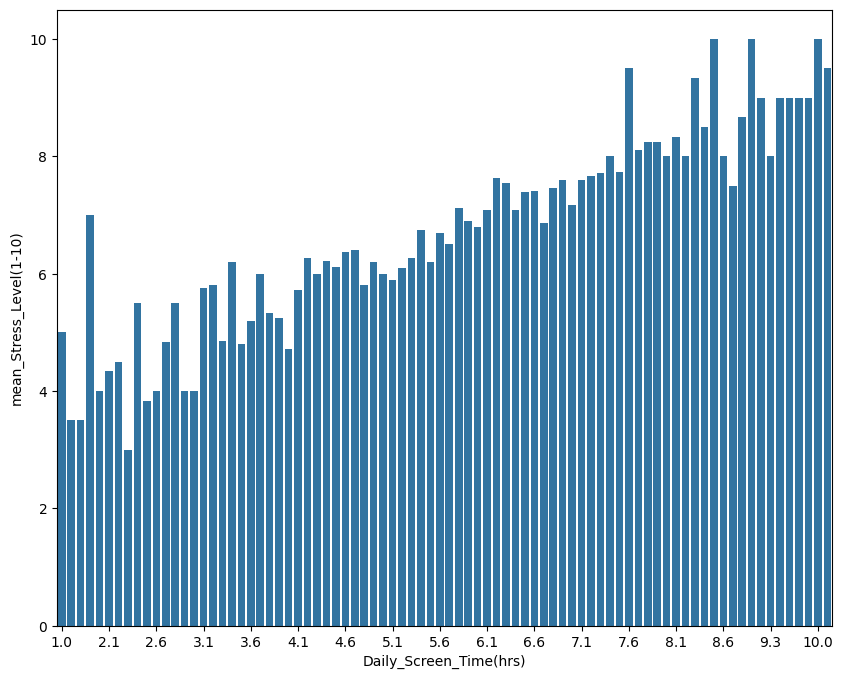

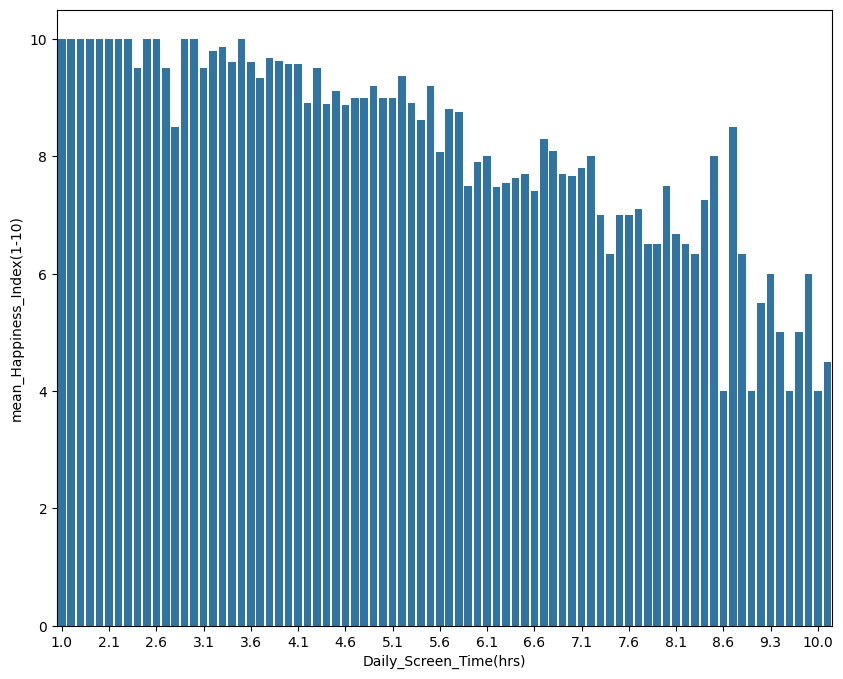

In [30]:
life_quality_columns = ["Sleep_Quality(1-10)", "Stress_Level(1-10)", "Happiness_Index(1-10)"]

screentime_aggregated = df.group_by("Daily_Screen_Time(hrs)").agg(
    [pl.col(col).mean().alias(f"mean_{col}") for col in life_quality_columns]
)

for col in life_quality_columns:
    plt.figure(figsize=(10, 8))
    sns.barplot(screentime_aggregated, x="Daily_Screen_Time(hrs)", y=f"mean_{col}")
    xticks = plt.gca().get_xticks()
    plt.gca().set_xticks(xticks[::5])
    plt.show()

### Social Media Platform and Wellbeing

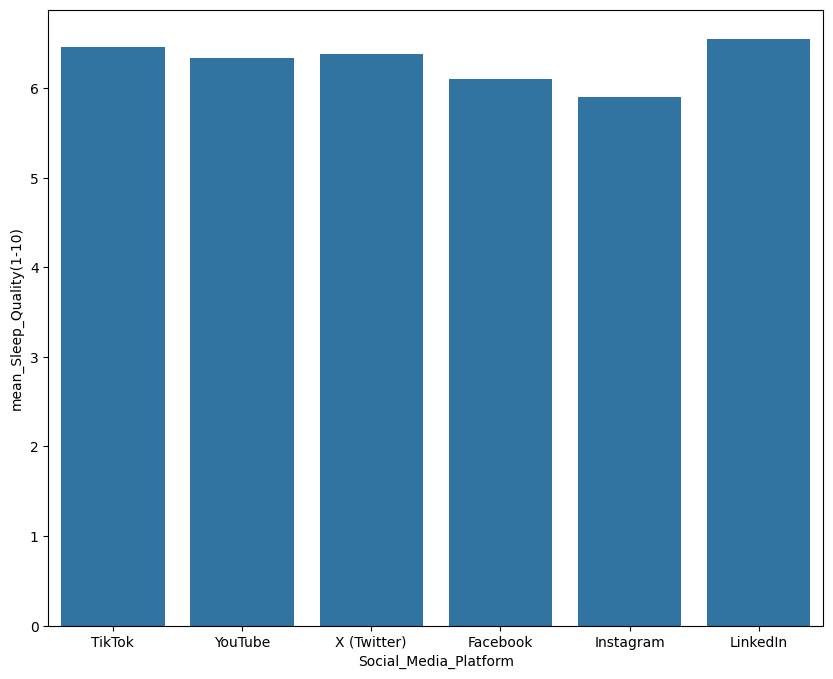

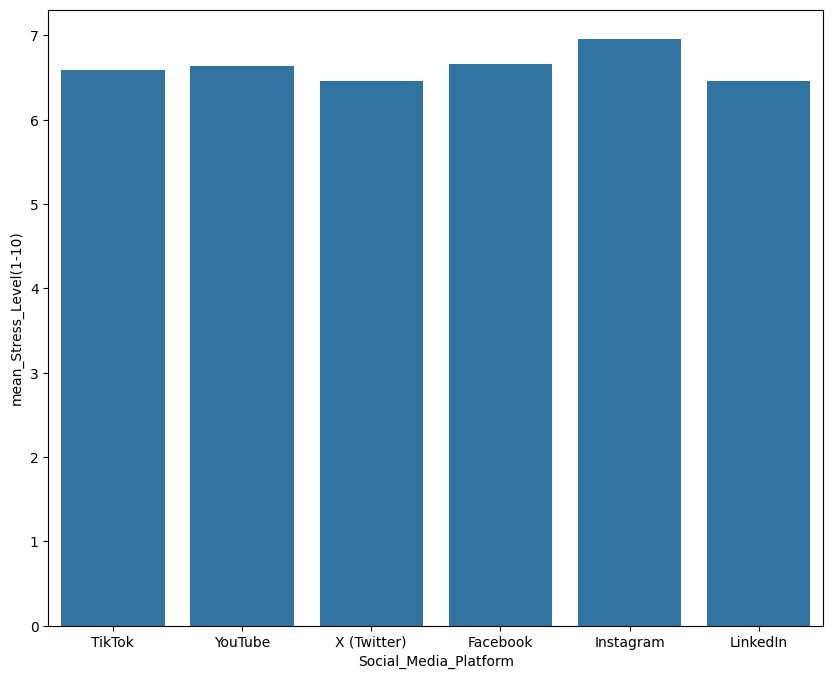

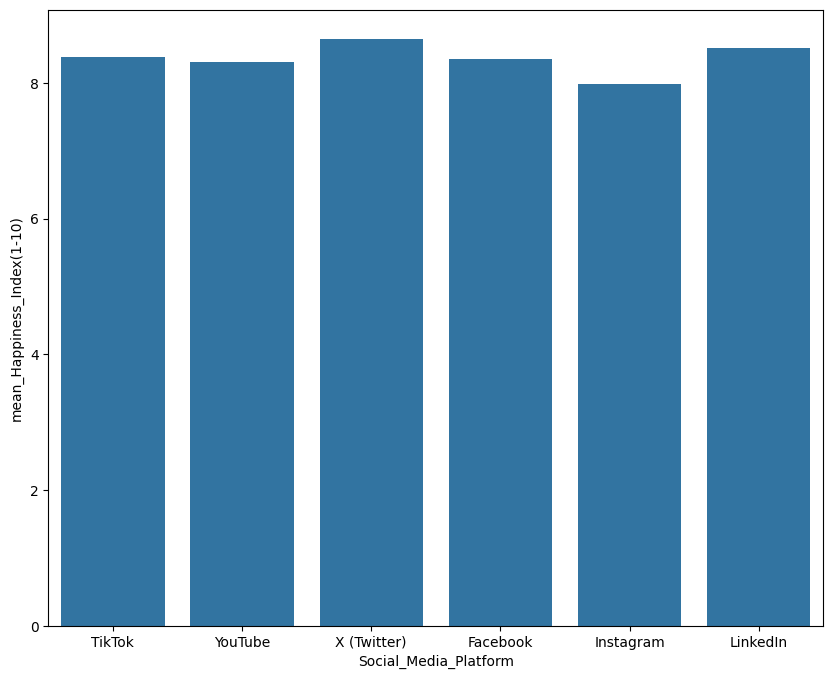

In [31]:
platform_aggregated = df.group_by("Social_Media_Platform").agg(
    [pl.col(col).mean().alias(f"mean_{col}") for col in life_quality_columns]
)

for col in life_quality_columns:
    plt.figure(figsize=(10, 8))
    sns.barplot(platform_aggregated, x="Social_Media_Platform", y=f"mean_{col}")
    plt.show()

### Social Media and Age

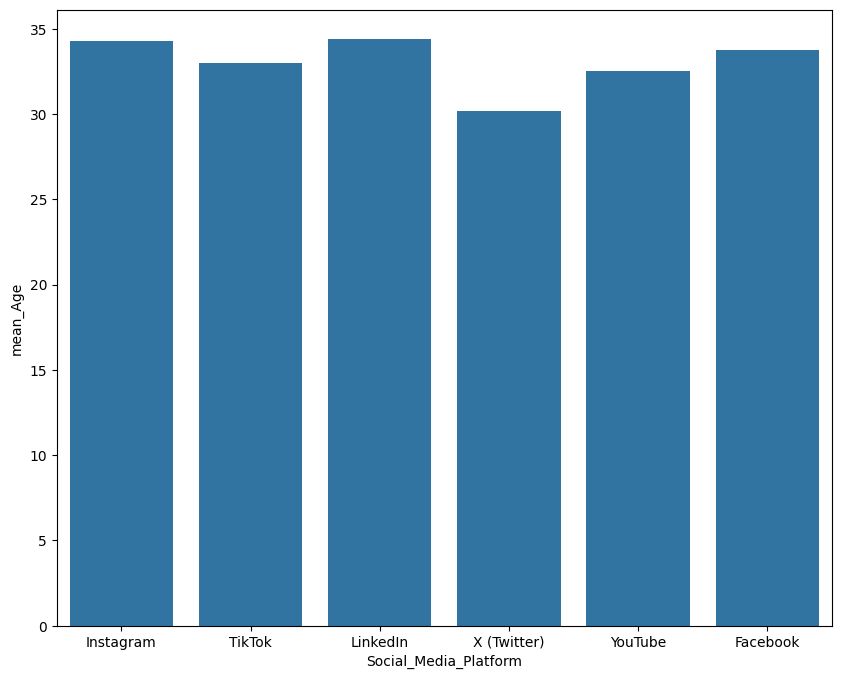

In [32]:
platform_aggregated = df.group_by("Social_Media_Platform").agg(pl.col("Age").mean().alias(f"mean_Age"))

plt.figure(figsize=(10, 8))
sns.barplot(platform_aggregated, x="Social_Media_Platform", y=f"mean_Age")
plt.show()

### Screen Time by Gender

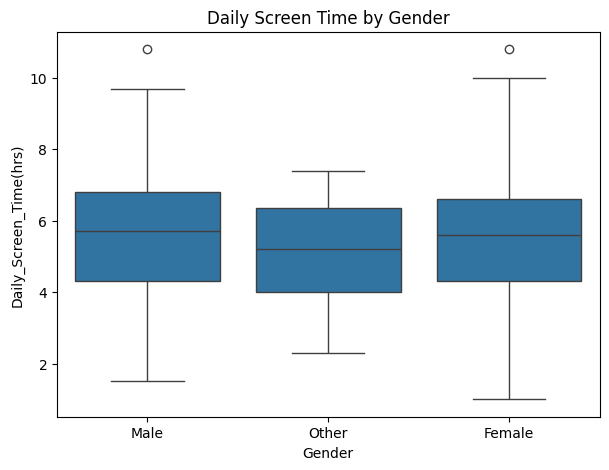

In [33]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="Gender", y="Daily_Screen_Time(hrs)")
plt.title("Daily Screen Time by Gender")
plt.show()

### Exercise and Sleep Quality

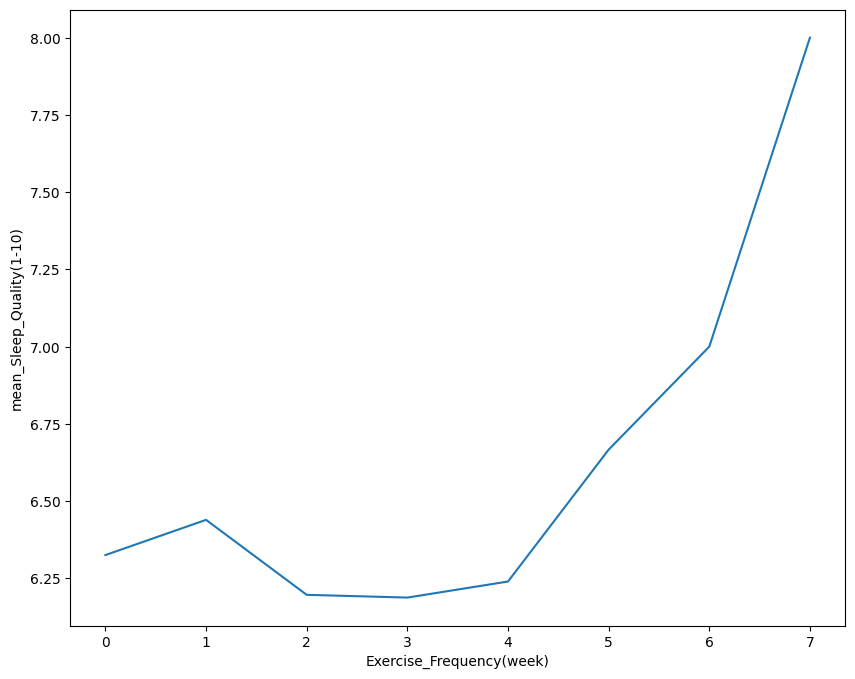

In [34]:
exercise_aggregated = df.group_by("Exercise_Frequency(week)").agg(pl.col("Sleep_Quality(1-10)").mean().alias(f"mean_Sleep_Quality(1-10)"))

plt.figure(figsize=(10, 8))
sns.lineplot(exercise_aggregated, x="Exercise_Frequency(week)", y=f"mean_Sleep_Quality(1-10)")
plt.show()

## Outliers

### Z-Scores

In [35]:
df_z_scores = df.with_columns(
    ((pl.col(col) - pl.col(col).mean()) / pl.col(col).std()).alias(f"z_scores_{col}")
    for col in numeric_columns
)
df_z_scores.head()

User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10),z_scores_Age,z_scores_Daily_Screen_Time(hrs),z_scores_Sleep_Quality(1-10),z_scores_Stress_Level(1-10),z_scores_Days_Without_Social_Media,z_scores_Exercise_Frequency(week),z_scores_Happiness_Index(1-10)
str,i64,str,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64
"""U001""",44,"""Male""",3.1,7.0,6.0,2.0,5.0,"""Facebook""",10.0,1.105552,-1.400675,0.454964,-0.400519,-0.610087,1.787031,1.065458
"""U002""",30,"""Other""",5.1,7.0,8.0,5.0,3.0,"""LinkedIn""",10.0,-0.299981,-0.247856,0.454964,0.89566,1.0039,0.386537,1.065458
"""U003""",23,"""Other""",7.4,6.0,7.0,1.0,3.0,"""YouTube""",6.0,-1.002747,1.077886,-0.19872,0.24757,-1.148083,0.386537,-1.558822
"""U004""",36,"""Female""",5.7,7.0,8.0,1.0,1.0,"""TikTok""",8.0,0.30239,0.09799,0.454964,0.89566,-1.148083,-1.013958,-0.246682
"""U005""",34,"""Female""",7.0,4.0,7.0,5.0,1.0,"""X (Twitter)""",8.0,0.1016,0.847322,-1.506087,0.24757,1.0039,-1.013958,-0.246682


In [ ]:
for col in numeric_columns:
    print(f"========== {col} ==========")
    outliers_df = df_z_scores.select(col, f"z_scores_{col}")
    outliers_df = outliers_df.filter(pl.col(f"z_scores_{col}").abs() > 3)
    
    display(outliers_df)

========== Age ==========


Age,z_scores_Age
i64,f64


========== Daily_Screen_Time(hrs) ==========


Daily_Screen_Time(hrs),z_scores_Daily_Screen_Time(hrs)
f64,f64
10.8,3.037679
10.8,3.037679


========== Sleep_Quality(1-10) ==========


Sleep_Quality(1-10),z_scores_Sleep_Quality(1-10)
f64,f64


========== Stress_Level(1-10) ==========


Stress_Level(1-10),z_scores_Stress_Level(1-10)
f64,f64


========== Days_Without_Social_Media ==========


Days_Without_Social_Media,z_scores_Days_Without_Social_Media
f64,f64
9.0,3.155883


========== Exercise_Frequency(week) ==========


Exercise_Frequency(week),z_scores_Exercise_Frequency(week)
f64,f64
7.0,3.187526
7.0,3.187526


========== Happiness_Index(1-10) ==========


Happiness_Index(1-10),z_scores_Happiness_Index(1-10)
f64,f64


### Interquartile Range

In [37]:
for col in numeric_columns:
    print(f"========== {col} ==========")
    df_current_col = df.select(col)
    iqr = df_current_col.quantile(0.75).item() - df_current_col.quantile(0.25).item()
    df_outliers = df_current_col.select(col).filter(
        (pl.col(col) > (df_current_col.quantile(0.75).item() + 1.5 * iqr)) |
        (pl.col(col) < (df_current_col.quantile(0.25).item() - 1.5 * iqr))
    )
    display(df_outliers)

========== Age ==========


Age
i64


========== Daily_Screen_Time(hrs) ==========


Daily_Screen_Time(hrs)
f64
10.8
10.8


========== Sleep_Quality(1-10) ==========


Sleep_Quality(1-10)
f64


========== Stress_Level(1-10) ==========


Stress_Level(1-10)
f64
2.0


========== Days_Without_Social_Media ==========


Days_Without_Social_Media
f64


========== Exercise_Frequency(week) ==========


Exercise_Frequency(week)
f64
7.0
7.0


========== Happiness_Index(1-10) ==========


Happiness_Index(1-10)
f64
